# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow


Computer Vision-- practise of writing algorithms which can discover patterns in visual data ex: self driving car recognizing the car in front

## Get the data

The image is from Food101 dataset with 101 different classes of food

The data was modified to 2 classes using image data modification

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-11 23:54:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   241MB/s    in 0.4s    

2023-01-11 23:54:41 (241 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data


Computer vision --- visualising many samples of data

In [2]:
! ls pizza_steak

test  train


In [3]:
! ls pizza_steak/train

pizza  steak


In [4]:
! ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
! ls pizza_steak/train/steak | wc -l

750


In [6]:
import os

# list number of files in pizza_steak directory
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
# Another way to find out how many images in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## To visualize images, first get the class names programmatically

In [8]:
#Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))#created a list of class names
print(class_names)


['pizza' 'steak']


In [9]:
# Visualising the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir,target_class):
  #Setup the target directory 
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['1248337.jpg']
Image shape: (364, 512, 3)


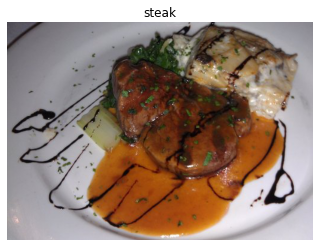

In [10]:
#View random image from training set
img =view_random_image(target_dir="pizza_steak/train/",
                  #target_class="pizza")
                  target_class="steak")

In [11]:
img

array([[[ 70,  67,  76],
        [ 70,  67,  76],
        [ 71,  68,  77],
        ...,
        [135, 134, 142],
        [135, 134, 142],
        [135, 134, 142]],

       [[ 76,  73,  82],
        [ 75,  72,  81],
        [ 76,  73,  82],
        ...,
        [135, 134, 142],
        [135, 134, 142],
        [134, 133, 141]],

       [[ 77,  74,  83],
        [ 76,  73,  82],
        [ 76,  73,  82],
        ...,
        [136, 135, 143],
        [135, 134, 142],
        [134, 133, 141]],

       ...,

       [[151, 152, 157],
        [154, 155, 160],
        [155, 156, 161],
        ...,
        [216, 212, 226],
        [215, 211, 225],
        [212, 208, 223]],

       [[152, 153, 158],
        [155, 156, 161],
        [156, 157, 162],
        ...,
        [217, 213, 227],
        [216, 212, 226],
        [213, 209, 224]],

       [[153, 154, 159],
        [155, 156, 161],
        [157, 158, 163],
        ...,
        [215, 211, 225],
        [214, 210, 224],
        [211, 207, 222]]

In [12]:
#View image shape
img.shape #returns width,height,colour channels

(364, 512, 3)

In [13]:
# Get all the pizel values between 0 and 1
img/255.

array([[[0.2745098 , 0.2627451 , 0.29803922],
        [0.2745098 , 0.2627451 , 0.29803922],
        [0.27843137, 0.26666667, 0.30196078],
        ...,
        [0.52941176, 0.5254902 , 0.55686275],
        [0.52941176, 0.5254902 , 0.55686275],
        [0.52941176, 0.5254902 , 0.55686275]],

       [[0.29803922, 0.28627451, 0.32156863],
        [0.29411765, 0.28235294, 0.31764706],
        [0.29803922, 0.28627451, 0.32156863],
        ...,
        [0.52941176, 0.5254902 , 0.55686275],
        [0.52941176, 0.5254902 , 0.55686275],
        [0.5254902 , 0.52156863, 0.55294118]],

       [[0.30196078, 0.29019608, 0.3254902 ],
        [0.29803922, 0.28627451, 0.32156863],
        [0.29803922, 0.28627451, 0.32156863],
        ...,
        [0.53333333, 0.52941176, 0.56078431],
        [0.52941176, 0.5254902 , 0.55686275],
        [0.5254902 , 0.52156863, 0.55294118]],

       ...,

       [[0.59215686, 0.59607843, 0.61568627],
        [0.60392157, 0.60784314, 0.62745098],
        [0.60784314, 0

##An end to end example

Lets build a convulational neural network to find patterns in images

1. Load image
2. preprocess images
3. Build CNN to find patterna in images
4. compile CNN
5. Fit CNN to our taining data


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set seed
tf.random.set_seed(42)


#Preprocess data(get all pixel values between 0 and 1, also called scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup path to the data directories
train_dir ="/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build a CNN model(Same as Tiny VGG on CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1= model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 232ms/step - loss: 0.5787 - accuracy: 0.6920 - val_loss: 0.4470 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4097 - accuracy: 0.8207 - val_loss: 0.3294 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3824 - accuracy: 0.8380 - val_loss: 0.3401 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3733 - accuracy: 0.8447 - val_loss: 0.3280 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3235 - accuracy: 0.8640 - val_loss: 0.2926 - val_accuracy: 0.8900


**Note** : change run_timw to GPU if one epoch is taking more than 10sec

In [15]:
#Model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Refer : https://poloclub.github.io/cnn-explainer/

## Using the same model as before


replicate the model as same as in before section to see how it works wit image data

model building is from Tensorflow Playground

In [16]:
#Set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


#Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#Fit the model
history_2= model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 0.8262 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
# Get summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


With the same parameters and 20X more than CNN model, model_2 performance is terrible.
Lets improve model_2

In [18]:
#Set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


#Compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#Fit the model
history_3= model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 4.2834 - accuracy: 0.6167 - val_loss: 0.6174 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6975 - accuracy: 0.6827 - val_loss: 0.4566 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.9126 - accuracy: 0.6607 - val_loss: 1.6126 - val_accuracy: 0.5140
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.5617 - accuracy: 0.7567 - val_loss: 0.4506 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4580 - accuracy: 0.7953 - val_loss: 0.5952 - val_accuracy: 0.7080


In [19]:
# Get summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification

1. Visualise the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and imporve model
7. repeat until satisfied

###1. Become/Visualise the data

['421476.jpg']
Image shape: (512, 512, 3)
['1383291.jpg']
Image shape: (384, 512, 3)


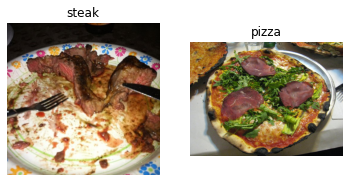

In [24]:
#Visulaise the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

###2. Preprocess the data

In [25]:
#Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Turn data into batches

Batch- small subset of data. Rather than looking at ~10000 images at one time, the model might only look at 32 at a time. Because:

1. 10,000 images might not fit the memory of processor(GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn well

32 is taken as ideal batch size almost all the time


In [27]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)


In [28]:
# Load in our image data from directories and train them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224,224),
                                               class_mode ="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# Get sample of training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train 
len(images), len(labels)

(32, 32)

In [31]:
#How many batches
len(train_data) # 1500/32

47

In [32]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         ...,
 
         [[0.6392157 , 0.6       , 0.6039216 ],
          [0.62745

In [33]:
images[7]

array([[[0.882353  , 0.43137258, 0.1764706 ],
        [0.8980393 , 0.6       , 0.29411766],
        [0.9960785 , 0.8745099 , 0.50980395],
        ...,
        [0.86666673, 0.73333335, 0.48235297],
        [0.80392164, 0.6666667 , 0.44705886],
        [0.87843144, 0.7490196 , 0.5411765 ]],

       [[0.9803922 , 0.5372549 , 0.2784314 ],
        [0.909804  , 0.62352943, 0.3137255 ],
        [0.9921569 , 0.87843144, 0.50980395],
        ...,
        [0.6745098 , 0.5411765 , 0.2901961 ],
        [0.67058825, 0.54509807, 0.3137255 ],
        [0.75294125, 0.6313726 , 0.40784317]],

       [[0.96470594, 0.5372549 , 0.27450982],
        [1.        , 0.73333335, 0.4156863 ],
        [0.9843138 , 0.8862746 , 0.52156866],
        ...,
        [0.7019608 , 0.5803922 , 0.3254902 ],
        [0.6745098 , 0.5568628 , 0.3137255 ],
        [0.7372549 , 0.62352943, 0.38823533]],

       ...,

       [[0.8980393 , 0.5686275 , 0.22352943],
        [0.7490196 , 0.40784317, 0.09803922],
        [0.80392164, 0

In [34]:
images[7].shape

(224, 224, 3)

In [35]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

###3. Create CNN model(start with a baseline)

baseline is a relatively simple model 

In [36]:
# Make creating model with little easy way
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
#Create the model(Baseline model)
model_4 = Sequential([
    Conv2D(filters=10, #no of sliding windows across an input(higher=more complex)
           kernel_size=3, #similar to 3X3 - size of sliding window across an input
           strides=1, #similar to 1X1 - size of the step the sliding window takes across an input
           padding="valid", #same if output shape = input shape, ie same=0
           activation="relu",
           input_shape=(224,224,3)), #input layer
     Conv2D(10,3,activation="relu"),
     Conv2D(10,3,activation="relu"),
     Flatten(),
     Dense(1,activation="sigmoid")      #output layer
    ])

#Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizers=Adam(),
                metrics=["accuracy"])

#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))